<a href="https://colab.research.google.com/github/raj26000/Python-and-Machine-Learning/blob/main/Assignment_Internshala.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('https://raw.githubusercontent.com/raj26000/Python-and-Machine-Learning/main/Dataset.csv')
data

,C1,C2,C3,C4,C5,C6,C7
0,P1,0.394667,0.0000,0.000000,0.000000,NaN,N
1,P1,0.387915,0.0000,-1.710853,0.000000,NaN,N
2,P1,0.361299,0.0104,-6.861376,0.000000,1.0,S
3,P1,0.488484,0.0104,35.202105,0.000000,1.0,S
4,P1,0.398206,0.0000,-18.481272,8.040560,NaN,N
...,...,...,...,...,...,...,...
22002,P39,0.554910,0.0000,1.123600,2.421191,NaN,N
22003,P39,0.532207,0.0000,-4.091244,1.984920,NaN,N
22004,P39,0.501031,0.0000,-5.857833,1.010012,NaN,N
22005,P39,0.511827,0.0000,2.154771,1.493184,NaN,N


# **Q1.**

In [65]:
data['C6'].fillna(0, inplace=True)
print('Mean of C6:', len(data.loc[data['C6'] == 1])/len(data))
data
#For given value of mean in binary column, all remaining values in C6 have to be imputed as 0.

Mean of C6: 0.04094151860771573


,C1,C2,C3,C4,C5,C6,C7
0,P1,0.394667,0.0000,0.000000,0.000000,0.0,N
1,P1,0.387915,0.0000,-1.710853,0.000000,0.0,N
2,P1,0.361299,0.0104,-6.861376,0.000000,1.0,S
3,P1,0.488484,0.0104,35.202105,0.000000,1.0,S
4,P1,0.398206,0.0000,-18.481272,8.040560,0.0,N
...,...,...,...,...,...,...,...
22002,P39,0.554910,0.0000,1.123600,2.421191,0.0,N
22003,P39,0.532207,0.0000,-4.091244,1.984920,0.0,N
22004,P39,0.501031,0.0000,-5.857833,1.010012,0.0,N
22005,P39,0.511827,0.0000,2.154771,1.493184,0.0,N


# **Q2.**

In [66]:
labels = Counter(data['C7'])
for level in labels.keys():
  print("Percent of ",level, ':', (labels[level]/len(data)) * 100, '%')

Percent of  N : 95.90584813922842 %
Percent of  S : 3.1717180896987323 %
Percent of  I : 0.9224337710728404 %


# **Q3.**

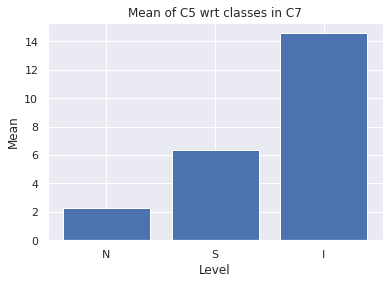

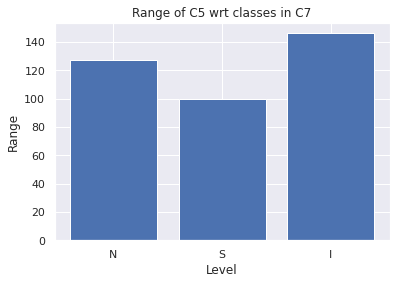

In [67]:
c5_N = list(data['C5'].loc[data['C7'] == 'N'])
c5_S = list(data['C5'].loc[data['C7'] == 'S'])
c5_I = list(data['C5'].loc[data['C7'] == 'I'])
range_N = max(c5_N) - min(c5_N)
range_S = max(c5_S) - min(c5_S)
range_I = max(c5_I) - min(c5_I)
mean_N = np.mean(c5_N)
mean_S = np.mean(c5_S)
mean_I = np.mean(c5_I)
plt.figure(1)
plt.title('Mean of C5 wrt classes in C7')
plt.bar(['N', 'S', 'I'], [mean_N, mean_S, mean_I])
plt.xlabel('Level')
plt.ylabel('Mean')
plt.figure(2)
plt.title('Range of C5 wrt classes in C7')
plt.bar(['N', 'S', 'I'], [range_N, range_S, range_I])
plt.xlabel('Level')
plt.ylabel('Range')
plt.show()

# **Q4.**

In [68]:
df = data.loc[(data.C6 == 0) & (data.C3 == 0)]
print('Total records with C3 and C6 zero:', len(df))
print('Total persons(P1-P39) with C3 and C6 zero:', len(Counter(df.C1)))
df

Total records with C3 and C6 zero: 21106
Total persons(P1-P39) with C3 and C6 zero: 39


,C1,C2,C3,C4,C5,C6,C7
0,P1,0.394667,0.0,0.000000,0.000000,0.0,N
1,P1,0.387915,0.0,-1.710853,0.000000,0.0,N
4,P1,0.398206,0.0,-18.481272,8.040560,0.0,N
5,P1,0.384828,0.0,-3.359605,7.487519,0.0,N
6,P1,0.399259,0.0,3.750137,6.172650,0.0,N
...,...,...,...,...,...,...,...
22002,P39,0.554910,0.0,1.123600,2.421191,0.0,N
22003,P39,0.532207,0.0,-4.091244,1.984920,0.0,N
22004,P39,0.501031,0.0,-5.857833,1.010012,0.0,N
22005,P39,0.511827,0.0,2.154771,1.493184,0.0,N


# **Q5.**

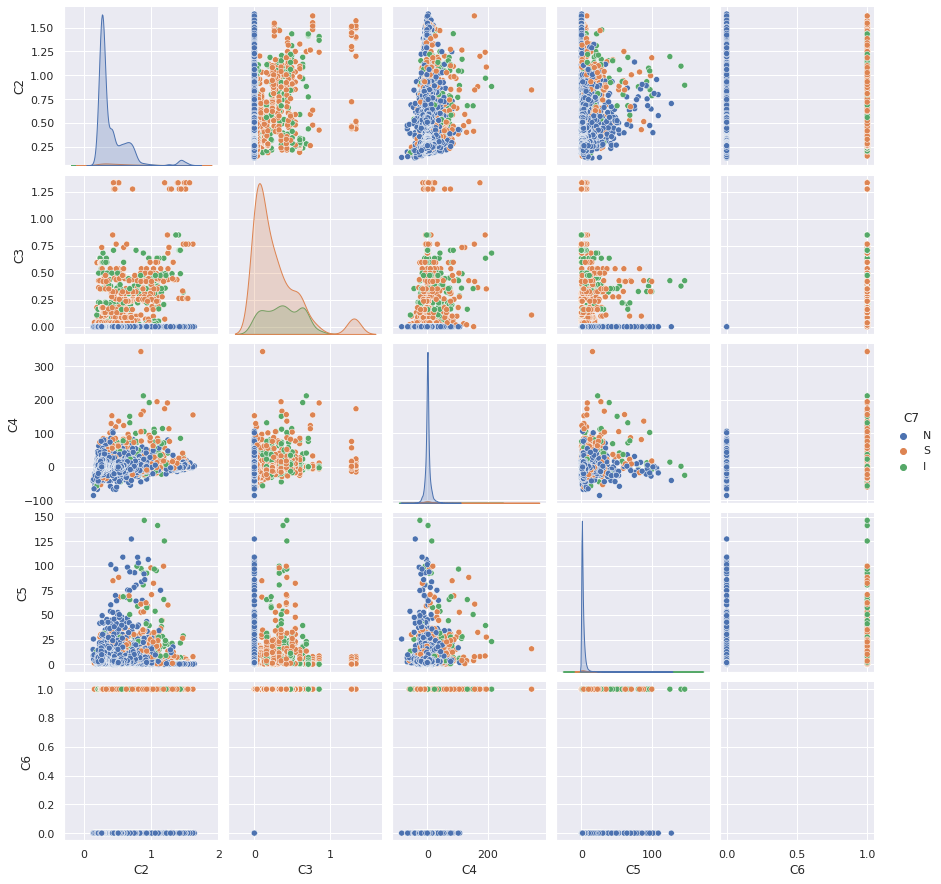

In [69]:
sns.set()
sns.pairplot(data=data, hue='C7')
#From the below pairplot, it is evident that the independent variables of S, I (orange, green) levels overlap the most in most of the scatterplots shown.

# **Q6.**

In [70]:
#Returns count of all columns for each level of target. For each columns, there are 203 records in 'I', 21106 in 'N', 698 in 'S'
data.groupby('C7').count()

,C1,C2,C3,C4,C5,C6
C7,,,,,,
I,203,203,203,203,203,203
N,21106,21106,21106,21106,21106,21106
S,698,698,698,698,698,698


In [71]:
#Returns mean of column C4 wrt each level of target.
data.groupby('C7').mean()['C4']

C7
I    17.512347
N     0.194087
S     8.368522
Name: C4, dtype: float64

# **Q7.**

In [72]:
print('Person code with max entries:', sorted(Counter(data['C1']).items(), key = lambda x: x[1], reverse=True)[0][0])

Person code with max entries: P6


# **Q8.**

In [73]:
df = data.loc[data['C7'] == 'I']
print('Person code with max entries in I level:', sorted(Counter(df['C1']).items(), key = lambda x: x[1], reverse=True)[0][0])

Person code with max entries in I level: P3


# **Q9.**

Selecting top best features based on f_classif metric, since this is a classification problem. Upon comparing the obtained values with actual data, we can conclude that the order of feature importance is: **C2, C3, C4, C5, C6 in decreasing order.**

In [74]:
from sklearn.feature_selection import SelectKBest, f_classif
df = data.drop(['C1', 'C7'], axis=1)
data_new = SelectKBest(f_classif, k = len(df.columns)).fit_transform(df, data['C7'])[:5]
data_new

array([[ 3.94667353e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 3.87915175e-01,  0.00000000e+00, -1.71085288e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 3.61298858e-01,  1.04000000e-02, -6.86137567e+00,
         0.00000000e+00,  1.00000000e+00],
       [ 4.88483662e-01,  1.04000000e-02,  3.52021052e+01,
         0.00000000e+00,  1.00000000e+00],
       [ 3.98205668e-01,  0.00000000e+00, -1.84812720e+01,
         8.04056047e+00,  0.00000000e+00]])

# **Q10.**


a) **Plot 3** has the least correlation between A and B (if absolute values of     correlation coefficient are considered)

---


b) **Plot 2** has a low correlation, but it does have a non-linear relation.


---


c) **Plot 4** clearly has a negative correlation, as a line with negative slope can fit easily through it. 



# **Q11.**

Using the below **Augmented Dickey-Fuller Test**, we can check for stationarity of timeseries. The test statistic is less than -7, which is highly negative and suggests a strong rejection of the Null Hypothesis. Further, the p-value of 10^-11 is way lower than 0.05, also pointing towards rejecting the Null Hypothesis. Thus, alternate hypothesis is true, and **timeseries of C2 is stationary**.

In [75]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['C2'])
print('Test Statistic:', result[0], ', p-value:', result[1])

Test Statistic: -7.6375842648513395 , p-value: 1.9339364386943205e-11


# **Q12.**

Performing Classification with RandomForest Classifier, generating F1 and recall score, plotting confusion matrix.

In [76]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
encoder = LabelEncoder()
data['C7'] = encoder.fit_transform(data['C7'])
X_train, X_test, y_train, y_test = train_test_split(data[['C2', 'C3', 'C4', 'C5', 'C6']], data['C7'], test_size=0.25)
df_train = X_train[['C2','C3','C4','C5']]
df_test = X_test[['C2','C3','C4','C5']]
scaler = MinMaxScaler()
train_sc = scaler.fit_transform(df_train)
test_sc = scaler.transform(df_test)
train_data = pd.DataFrame(data = train_sc, columns = df_train.columns)
train_data['C6'] = X_train['C6'].to_numpy()
test_data = pd.DataFrame(data = test_sc, columns = df_test.columns)
test_data['C6'] = X_test['C6'].to_numpy()

F1 score: 0.9930541841730735
Recall score: 0.9938204289349327


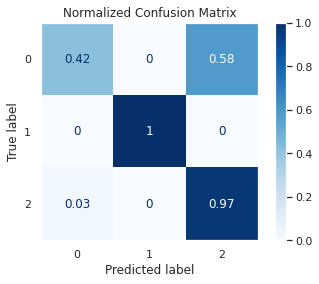

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, plot_confusion_matrix
clf = RandomForestClassifier(n_estimators = 700)
clf.fit(train_data, y_train)
y_pred = clf.predict(test_data)
print('F1 score:', f1_score(y_test, y_pred, average='weighted'))
print('Recall score:', recall_score(y_test, y_pred, average='weighted'))
plot_confusion_matrix(clf, test_data, y_test, normalize='true', cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix')
plt.grid(False)